# Lista 1 de Otimização Natural

### Questão 1) Calcular $\int_{0}^{1} xe^{-x} dx$

#### a) integração por partes

In [1]:
from sympy import *
x = Symbol('x')

eq1 = x*exp(-x)

In [2]:
resposta = integrate(eq1, (x, 0, 1))
resposta

-2*exp(-1) + 1

#### b) pelo método de monte carlo, usando 10 números escolhidos aleatoriamente com densidade uniforme entre 0 e 1;

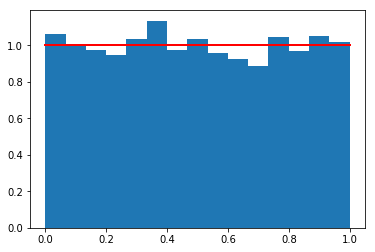

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


s = np.random.uniform(0,1,10000)

count, bins, ignored = plt.hist(s, 15, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()


In [4]:
sum(s*np.exp(-s))/len(s)

0.2628591272082551

#### c) pelo método de monte carlo, usando 10 números escolhidos aleatoriamente com densidade exponencial entre 0 e 1;

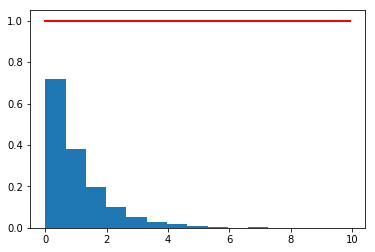

array([0.01545976, 0.55816465, 0.57854988, ..., 0.43877267, 0.35242799,
       0.13589614])

In [ ]:
q = np.random.exponential(1,10000)

count, bins, ignored = plt.hist(q, 15, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()

q

In [ ]:
#plt.hist(q, density=True, cumulative=True, label='CDF',histtype='step', alpha=0.8, color='k')

In [ ]:
sum(q*np.exp(-q))/len(q)

0.2508716033550247

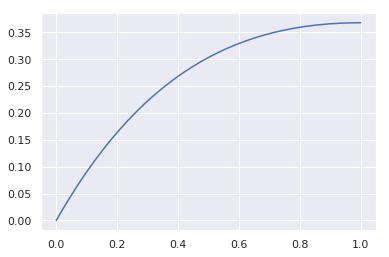

In [ ]:
pts = np.linspace(0,1,1000);

queisso = pts*np.exp(-pts)

import seaborn as sns
sns.set(style="darkgrid")

sns.lineplot(pts,queisso)
plt.show()

### Questão 2) 

Usando N = 20 números aleatórios, escolhidos a partir de uma p.d.f. uniforme entre -1 e +1, calcular uma aproximação para o número $\pi$ pelo método de Monte Carlo. Faça o mesmo no computador, utilizando um valor alto para N (por exemplo, 1.000.000). Comente o resultado.


A aproximação: $\int_{-1}^{1} \frac{dx}{\sqrt{1-x^{2}}}$

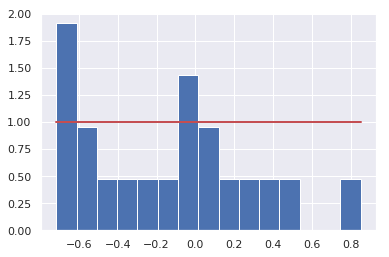

In [ ]:
s = np.random.uniform(-1,1,20)

count, bins, ignored = plt.hist(s, 15, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()

In [ ]:
s

array([-0.08361761, -0.71646339,  0.46194281,  0.16399429, -0.48193776,
       -0.19572721, -0.64783733,  0.28764627, -0.52249387, -0.01496749,
        0.37566463, -0.15427736,  0.0157696 , -0.63149235, -0.05412542,
       -0.6925483 , -0.30249649, -0.5170132 ,  0.04157657,  0.85211909])

In [ ]:
sum(1/(np.sqrt(1-s**2)))/len(s)

1.158334975799532

#### Plotando o gráfico da função $\frac{1}{\sqrt{1-x^{2}}}$

In [ ]:
pts = np.linspace(-0.99,0.99,1000);

queisso = 1/(np.sqrt(1-(pts**2)))

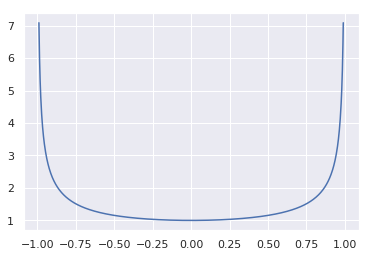

In [ ]:
sns.lineplot(pts,queisso)
plt.show()

### Questão 3) 

Escrever um algoritmo para gerar números $x(n)$ com energia $J(x) = x^{2}$, de forma que as probabilidades dos números gerados ejam proporcionais aos fatores de Boltzmann $e^{-J(x)/T}$, com temperatura $T = 0.1$. Começando de um valor $x(0)$ qualquer, aplique sempre perturbações $\epsilon R$ ao valor $x(n)$ atual. Neste caso, R é uma vriável aleatória uniforme. Considere $\epsilon = 0.1$.

a) Execute o algoritmo proposto no computador, calculando $x(n)$ até $n = 100.000$.

b) Execute manualmente os 10 primeiros passos do algoritmo.

In [ ]:
x_n = 0 # definindo o primeiro ponto, x_0 
x_validos = np.array(x_n)
epsilon = 0.1
T = 0.1
n = 10**5## número de amostras geradas
mu, sigma = 0, 0.1 # mean and standard deviation

In [ ]:
while np.size(x_validos) < n:
    R = np.random.normal(mu, sigma)
    #R = np.random.uniform(0,1)
    x_candidato = x_n + epsilon*R
    delta_J = (x_candidato)**2 - x_n**2
    q = exp(-delta_J/T)
    r = np.random.uniform(0,1)
    if r > q:
        a = 0
    else:
        a = 1
    x_proximo = (1-a)*x_n + a*x_candidato 
    if x_proximo != x_n:
        np.append(x_validos,x_proximo)
        
#x_validos

In [ ]:
count, bins, ignored = plt.hist(x_validos, 15, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()

In [ ]:
np.size(x_validos)